### **1. IoU(Intersection over Union) : practice**

In [ ]:
!pip install selectivesearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4349 sha256=d3febc00540f852159860ba004093971da8a5e043d165f2610395e9278f650c2
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [ ]:
!mkdir /content/data
!wget -O /content/data/practice_audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

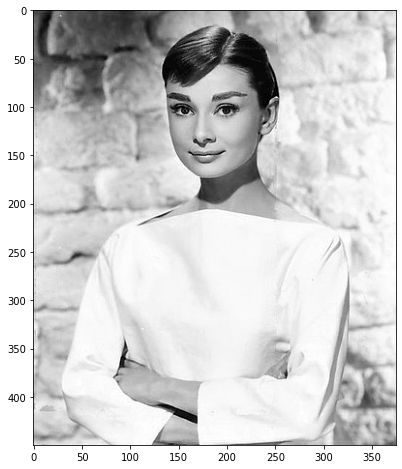

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread('/content/data/practice_audrey01.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.show()

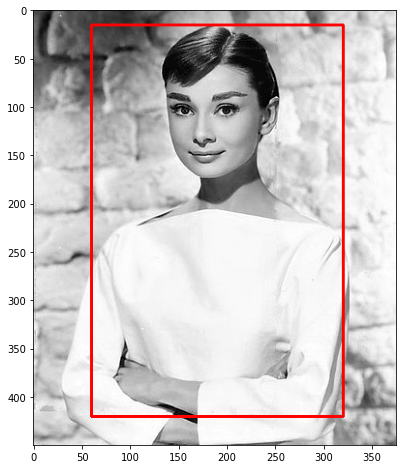

In [ ]:
rgb_red = (255, 0, 0)
gt_box = [60, 15, 320, 420]

image_pracitce = image.copy()
image_pracitce = cv2.rectangle(image_pracitce, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=rgb_red, thickness=2)

plt.figure(figsize=(10, 8))
plt.imshow(image_pracitce)
plt.show()

In [ ]:
import selectivesearch

_, regions = selectivesearch.selective_search(image_pracitce, scale=100, min_size=3000)
print(f'{type(regions)} / {len(regions)}')

<class 'list'> / 35


In [ ]:
regions

[{'labels': [0.0], 'rect': (0, 0, 286, 257), 'size': 15387},
 {'labels': [1.0], 'rect': (284, 0, 90, 420), 'size': 6986},
 {'labels': [2.0], 'rect': (59, 14, 262, 407), 'size': 3986},
 {'labels': [3.0], 'rect': (62, 17, 256, 401), 'size': 11838},
 {'labels': [4.0], 'rect': (63, 18, 114, 91), 'size': 6134},
 {'labels': [5.0], 'rect': (134, 18, 90, 156), 'size': 7395},
 {'labels': [6.0], 'rect': (197, 18, 120, 132), 'size': 7196},
 {'labels': [7.0], 'rect': (166, 23, 87, 176), 'size': 8606},
 {'labels': [8.0], 'rect': (232, 79, 85, 148), 'size': 6972},
 {'labels': [9.0], 'rect': (323, 105, 51, 248), 'size': 11158},
 {'labels': [10.0], 'rect': (63, 171, 254, 246), 'size': 39147},
 {'labels': [11.0], 'rect': (0, 202, 57, 242), 'size': 12958},
 {'labels': [12.0], 'rect': (63, 253, 80, 165), 'size': 4321},
 {'labels': [13.0], 'rect': (0, 258, 171, 191), 'size': 4506},
 {'labels': [14.0], 'rect': (84, 313, 100, 105), 'size': 6480},
 {'labels': [15.0], 'rect': (323, 327, 51, 85), 'size': 4275}

In [ ]:
import numpy as np

def calculate_iou(pred_box, gt_box):
  x1 = np.maximum(pred_box[0], gt_box[0])
  y1 = np.maximum(pred_box[1], gt_box[1])
  x2 = np.minimum(pred_box[2], gt_box[2])
  y2 = np.minimum(pred_box[3], gt_box[3])

  intersection = np.maximum(x2-x1, 0) * np.maximum(y2-y1, 0)

  pred_box = (pred_box[2]-pred_box[0]) * (pred_box[3]-pred_box[1])
  gt_box = (gt_box[2]-gt_box[0]) * (gt_box[3]-gt_box[1])
  union = pred_box + gt_box - intersection

  iou = intersection / union
  return iou

<class 'list'> / 35
index : 2 / iou : 0.9874899187876287 / pred_coordinate : (59, 14, 321, 421)
index : 3 / iou : 0.9748907882241216 / pred_coordinate : (62, 17, 318, 418)
index : 10 / iou : 0.5933903133903133 / pred_coordinate : (63, 171, 317, 417)
index : 22 / iou : 0.5958024691358025 / pred_coordinate : (63, 171, 317, 418)
index : 25 / iou : 0.5008648690956052 / pred_coordinate : (63, 171, 374, 449)
index : 30 / iou : 0.7924914675767918 / pred_coordinate : (62, 0, 374, 420)
index : 31 / iou : 0.6502834732938317 / pred_coordinate : (0, 0, 286, 444)
index : 32 / iou : 0.6270619201314865 / pred_coordinate : (0, 0, 374, 449)
index : 33 / iou : 0.6270619201314865 / pred_coordinate : (0, 0, 374, 449)
index : 34 / iou : 0.6270619201314865 / pred_coordinate : (0, 0, 374, 449)


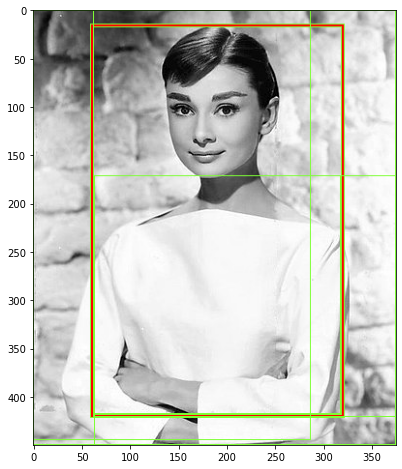

In [ ]:
rgb_green = (125, 255, 51)

regions_rects = [region['rect'] for region in regions]
print(f'{type(regions_rects)} / {len(regions_rects)}')

for index, pred_box in enumerate(regions_rects):
  pred_box = list(pred_box)
  pred_box[2] += pred_box[0]
  pred_box[3] += pred_box[1]
  iou = calculate_iou(pred_box, gt_box)
  
  if iou > 0.5:
      print(f'index : {index} / iou : {iou} / pred_coordinate : {(pred_box[0], pred_box[1], pred_box[2], pred_box[3])}')
      cv2.rectangle(image_pracitce, (pred_box[0], pred_box[1]), (pred_box[2], pred_box[3]), color=rgb_green, thickness=1)

plt.figure(figsize=(10, 8))
plt.imshow(image_pracitce)
plt.show()

### **2. IoU(Intersection over Union) : test**

In [ ]:
!mkdir /content/data
!wget -O /content/data/test_audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2022-07-19 07:12:26--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/test_audrey01.jpg’

/content/data/test_ 100%[===================>]  29.40K  --.-KB/s    in 0.002s  

2022-07-19 07:12:26 (12.1 MB/s) - ‘/content/data/test_audrey01.jpg’ saved [30102/30102]



In [ ]:
image = cv2.cvtColor(cv2.imread('/content/data/test_audrey01.jpg'), cv2.COLOR_BGR2RGB)

In [ ]:
import numpy as np

def calculate_iou(pred_box, gt_box):
  x1 = np.maximum(pred_box[0], gt_box[0])
  y1 = np.maximum(pred_box[1], gt_box[1])
  x2 = np.minimum(pred_box[2], gt_box[2])
  y2 = np.minimum(pred_box[3], gt_box[3])

  intersection = np.maximum(x2-x1, 0) * np.maximum(y2-y1, 0)

  pred_box = (pred_box[2]-pred_box[0]) * (pred_box[3]-pred_box[1])
  gt_box = (gt_box[2]-gt_box[0]) * (gt_box[3]-gt_box[1])
  union = pred_box + gt_box - intersection

  iou = intersection / union
  return iou

In [ ]:
def show_iou(image, min_size, iou_score):
  gt_box = [60, 15, 320, 420]
  rgb_red = (255, 0, 0)
  rgb_green = (125, 255, 51)

  image_test = image.copy()
  image_test = cv2.rectangle(image_test, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=rgb_red, thickness=2)

  _, regions = selectivesearch.selective_search(image_test, scale=100, min_size=min_size)
  print(f'{type(regions)} / {len(regions)}')

  regions_rects = [region['rect'] for region in regions]

  for index, pred_box in enumerate(regions_rects):
    pred_box = list(pred_box)
    pred_box[2] += pred_box[0]
    pred_box[3] += pred_box[1]
    iou = calculate_iou(pred_box, gt_box)

    if iou > iou_score:
      print(f'index : {index} / iou : {iou} / pred_coordinate : {(pred_box[0], pred_box[1], pred_box[2], pred_box[3])}')
      cv2.rectangle(image_test, (pred_box[0], pred_box[1]), (pred_box[2], pred_box[3]), color=rgb_green, thickness=1)
      text = "{}: {:.2f}".format(index, iou)
      cv2.putText(image_test, text, (pred_box[0]+100, pred_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=rgb_green, thickness=1)

  plt.figure(figsize=(12, 10))
  plt.imshow(image_test)
  plt.show()

<class 'list'> / 35
index : 2 / iou : 0.9874899187876287 / pred_coordinate : (59, 14, 321, 421)
index : 3 / iou : 0.9748907882241216 / pred_coordinate : (62, 17, 318, 418)
index : 10 / iou : 0.5933903133903133 / pred_coordinate : (63, 171, 317, 417)
index : 22 / iou : 0.5958024691358025 / pred_coordinate : (63, 171, 317, 418)
index : 25 / iou : 0.5008648690956052 / pred_coordinate : (63, 171, 374, 449)
index : 30 / iou : 0.7924914675767918 / pred_coordinate : (62, 0, 374, 420)
index : 31 / iou : 0.6502834732938317 / pred_coordinate : (0, 0, 286, 444)
index : 32 / iou : 0.6270619201314865 / pred_coordinate : (0, 0, 374, 449)
index : 33 / iou : 0.6270619201314865 / pred_coordinate : (0, 0, 374, 449)
index : 34 / iou : 0.6270619201314865 / pred_coordinate : (0, 0, 374, 449)


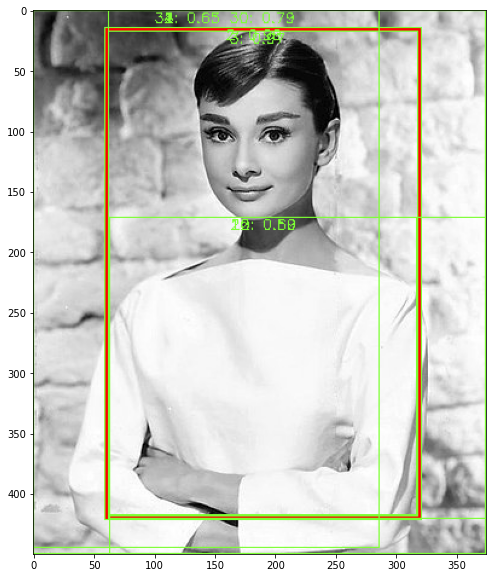

In [ ]:
show_iou(image, min_size=3000, iou_score=0.5)